CNN

In [115]:
#Reading total frames
import pandas as pd
df_total = pd.read_csv('/content/drive/My Drive/Total_frames/totalwithmaininfo.csv')
df_total.head()

,EAR,MAR,CIR,Mouth_EYE,label,Respondent,EAR_N,MAR_N,Circularity_N,MOE_N
0,0.284246,0.947518,0.482625,3.333446,10.0,0,0.318166,-1.152166,3.818145,-1.250515
1,0.292527,0.994375,0.483918,3.399259,10.0,0,0.641281,-0.589006,3.883234,-1.071398
2,0.267323,0.996076,0.449280,3.726111,10.0,0,-0.342113,-0.568555,2.139234,-0.181830
3,0.350346,0.967453,0.534985,2.761419,10.0,0,2.897273,-0.912575,6.454395,-2.807358
4,0.328317,0.988977,0.537504,3.012266,10.0,0,2.037727,-0.653878,6.581202,-2.124648


In [0]:

df_total.loc[(df_total['label'] == 10),'label'] = 1


In [117]:
df_total

,EAR,MAR,CIR,Mouth_EYE,label,Respondent,EAR_N,MAR_N,Circularity_N,MOE_N
0,0.284246,0.947518,0.482625,3.333446,1.0,0,0.318166,-1.152166,3.818145,-1.250515
1,0.292527,0.994375,0.483918,3.399259,1.0,0,0.641281,-0.589006,3.883234,-1.071398
2,0.267323,0.996076,0.449280,3.726111,1.0,0,-0.342113,-0.568555,2.139234,-0.181830
3,0.350346,0.967453,0.534985,2.761419,1.0,0,2.897273,-0.912575,6.454395,-2.807358
4,0.328317,0.988977,0.537504,3.012266,1.0,0,2.037727,-0.653878,6.581202,-2.124648
...,...,...,...,...,...,...,...,...,...,...
3835,0.155557,1.010112,0.313427,6.493502,1.0,7,-10.617024,5.267015,-17.886938,19.301433
3836,0.152062,1.018089,0.297301,6.695213,1.0,7,-10.844253,5.723550,-19.624125,20.380396
3837,0.158283,1.010600,0.323855,6.384763,1.0,7,-10.439820,5.294953,-16.763530,18.719781
3838,0.152245,1.045366,0.307941,6.866363,1.0,7,-10.832399,7.284824,-18.477909,21.295892


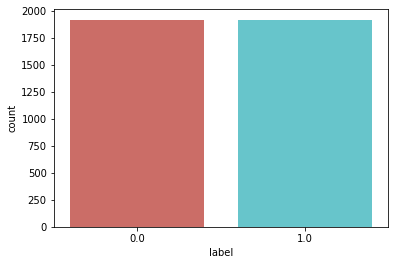

In [118]:
# Visualizing the result column
import seaborn as sns
import matplotlib.pyplot as plt

df_total.label.value_counts()
sns.countplot(x = 'label', data = df_total, palette = 'hls')
plt.show()

In [0]:
#Diving the columns into dependent and independent columns
X = df_total[['EAR','MAR','CIR','Mouth_EYE','EAR_N','MAR_N', 'Circularity_N', 'MOE_N']]
Y = df_total['label']

In [0]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [121]:
y_train.shape

(3072,)

In [0]:
import numpy as np
X_train_shaped = np.expand_dims(X_train, axis=2)

In [108]:
X_train_shaped.shape

(3072, 8, 1)

In [0]:
X_test_shaped = np.expand_dims(X_test, axis=2)

In [110]:
X_test_shaped.shape

(768, 8, 1)

In [111]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv1D
from keras.optimizers import Adam, RMSprop
from keras.layers import Dropout
## Create Model ##

model = Sequential()

model.add(Conv1D(64, kernel_size = 3, activation = 'relu', input_shape = (8,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation = 'sigmoid'))


## Compile Model ##
optimizer = Adam(lr=0.00001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

## Train Model and Check Validation Accuracy ##
model.fit(X_train_shaped, y_train, validation_data = (X_test_shaped,y_test), epochs = 100)

Train on 3072 samples, validate on 768 samples
Epoch 1/100
3072/3072 [==============================] - 0s 97us/step - loss: 0.6538 - accuracy: 0.5088 - val_loss: 0.6695 - val_accuracy: 0.4727
Epoch 2/100
3072/3072 [==============================] - 0s 53us/step - loss: 0.6460 - accuracy: 0.5091 - val_loss: 0.6639 - val_accuracy: 0.4727
Epoch 3/100
3072/3072 [==============================] - 0s 50us/step - loss: 0.6411 - accuracy: 0.5225 - val_loss: 0.6587 - val_accuracy: 0.4727
Epoch 4/100
3072/3072 [==============================] - 0s 52us/step - loss: 0.6372 - accuracy: 0.5218 - val_loss: 0.6540 - val_accuracy: 0.4766
Epoch 5/100
3072/3072 [==============================] - 0s 52us/step - loss: 0.6360 - accuracy: 0.5306 - val_loss: 0.6497 - val_accuracy: 0.4779
Epoch 6/100
3072/3072 [==============================] - 0s 52us/step - loss: 0.6285 - accuracy: 0.5329 - val_loss: 0.6452 - val_accuracy: 0.4844
Epoch 7/100
3072/3072 [==============================] - 0s 52us/step - loss:

In [112]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 6, 64)             256       
_________________________________________________________________
flatten_5 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                12320     
_________________________________________________________________
dense_16 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 17        
Total params: 13,121
Trainable params: 13,121
Non-trainable params: 0
__________________________________________________

In [113]:
#Finding Accuracy and Confusion Matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

y_pred = model.predict_classes(X_test_shaped)
accuracy = accuracy_score(y_test, np.array(y_pred))
print([accuracy])
print(confusion_matrix(y_test, y_pred))

[0.7708333333333334]
[[334  71]
 [105 258]]


LSTM


In [0]:
import numpy as np
x_shaped_train  = np.array(X_train).reshape(512,6,8)
x_shaped_test  = np.array(X_test).reshape(128,6,8)

In [123]:
y_train = np.array(y_train)
y_test = np.array(y_test)

y_shaped_train  = []
for i in range(0, len(y_train), 6):
  y_shaped_train.append([y_train[i]])
print(len(y_shaped_train))

y_shaped_test  = []
for i in range(0, len(y_test), 6):
  y_shaped_test.append([y_test[i]])
print(len(y_shaped_test))

512
128


In [124]:
x_shaped_train.shape

(512, 6, 8)

In [125]:
x_shaped_test.shape

(128, 6, 8)

In [126]:
y_shaped_train = np.array(y_shaped_train)
y_shaped_train.shape

(512, 1)

In [127]:
y_shaped_test = np.array(y_shaped_test)
y_shaped_test.shape

(128, 1)

In [128]:
import numpy as np
from keras.utils import to_categorical
from keras.layers import Dense, Flatten, Dropout, ZeroPadding3D
from keras.layers.recurrent import LSTM
from keras.models import Sequential, load_model
from keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import TimeDistributed
from keras.layers.convolutional import (Conv2D, MaxPooling3D, Conv3D,
    MaxPooling2D)
from collections import deque
import sys

metrics = ['accuracy']
model = Sequential()
model.add(Dense(1024, activation='sigmoid'))
model.add(LSTM(512, return_sequences=True,
                       input_shape=(5, 4,),
                       dropout=0.5))

model.add(Flatten())
# Dense is fully connected layer. 16 hidden units
# activation for lstm is basically sigmoid or tanh
model.add(Dense(216, activation='sigmoid')) #FC1
model.add(Dense(32, activation='tanh')) #FC2
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))#FC3
model.add(Dropout(0.5))
model.add(Dense(1, activation='tanh'))#Output Layer
optimizer = Adam(lr=0.00005)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)
model.fit(x_shaped_train, y_shaped_train, validation_data = (x_shaped_test,y_shaped_test), epochs=50, batch_size=  10)
model.predict_classes(x_shaped_test)

Train on 512 samples, validate on 128 samples
Epoch 1/50
512/512 [==============================] - 7s 13ms/step - loss: 3.2194 - accuracy: 0.3789 - val_loss: 0.7536 - val_accuracy: 0.5234
Epoch 2/50
512/512 [==============================] - 6s 12ms/step - loss: 2.8149 - accuracy: 0.4395 - val_loss: 0.8228 - val_accuracy: 0.5234
Epoch 3/50
512/512 [==============================] - 7s 13ms/step - loss: 2.7177 - accuracy: 0.4395 - val_loss: 0.6868 - val_accuracy: 0.5234
Epoch 4/50
512/512 [==============================] - 6s 13ms/step - loss: 2.7176 - accuracy: 0.4238 - val_loss: 0.7107 - val_accuracy: 0.5234
Epoch 5/50
512/512 [==============================] - 6s 13ms/step - loss: 2.7699 - accuracy: 0.4570 - val_loss: 0.7210 - val_accuracy: 0.5234
Epoch 6/50
512/512 [==============================] - 6s 13ms/step - loss: 2.5233 - accuracy: 0.4648 - val_loss: 0.7999 - val_accuracy: 0.5234
Epoch 7/50
512/512 [==============================] - 6s 13ms/step - loss: 2.1215 - accuracy: 0.

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [129]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 6, 1024)           9216      
_________________________________________________________________
lstm_2 (LSTM)                (None, 6, 512)            3147776   
_________________________________________________________________
flatten_6 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 216)               663768    
_________________________________________________________________
dense_20 (Dense)             (None, 32)                6944      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 16)               

In [99]:
#Finding Accuracy and Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

y_pred = model.predict_classes(x_shaped_test)
acc = accuracy_score(y_shaped_test, y_pred)
print([acc])
print(confusion_matrix(y_shaped_test, y_pred))

[0.5234375]
[[ 0 61]
 [ 0 67]]
